# Some simple examples of interacting with the HELP database

In this notebook we will demostrate some ways you can use HELP data. The simplest way to use HELP data is probably to download a fits table from HeDaM and use the table with TOPCAT or astropy. In this example we will look at the ELAIS-N1 field. You can download the file (10Gb) here:

http://hedam.lam.fr/HELP/dataproducts/dmu32/dmu32_ELAIS-N1/data/ELAIS-N1_20171016.fits

That is a large fiel that would take some time to download. Perhaps you only want to look a small region with the field or only want a subset of columns for you analysis. This is where the Virtual Obersvatory (VO) can be very useful. It allows you to query the database for only the specific information you are interested in.

In order to do this we will use PyVO...







In [22]:
import pyvo as vo

If that failed you probably haven't installed PyVO. If you install the herschelhelp_python package and run this notebook with that kernel then you will have PyVO installed.

https://github.com/H-E-L-P/herschelhelp_python

Alternatively you can install it individually using your preferred method for installing Python packages.

Now in order to query the VO we need to write a query. As an example lets get all the ELAIS-N1 objects with a redshift greater than 4.

In [23]:
# SELECT - columns you want to select
# FROM -  which table you want to 
# WHERE - the criteria the search results must meet

example_query="""
SELECT ra, dec, redshift, cigale_dustlumin
FROM herschelhelp.main
WHERE (
herschelhelp.main.field='ELAIS-N1'
AND herschelhelp.main.redshift>4
)
"""

You could copy paste the above query into the html query page:

http://vohedamtest.lam.fr/__system__/adql/query/form

But here we will execute it using PyVO:

In [24]:
#Then we establish the VO connection to our database
service = vo.dal.TAPService("http://vohedamtest.lam.fr/__system__/tap/run/tap")

In [25]:
#Then we execute the query
resultset = service.search(example_query)

In [26]:
resultset.table

ra,dec,redshift,cigale_dustlumin
deg,deg,,W
float64,float64,float32,float64
246.555662513057,55.003551059499301,4.5766001,--
246.546474785057,54.997026013499301,4.8196998,--
246.397152569057,54.927381462499298,4.2312999,--
246.38414028705699,54.952376668499298,4.8771,--
246.391144082057,54.9396872434993,4.0481,--
246.44518433205701,55.000396006499301,5.0402002,--
246.41164064105701,55.0204406554993,5.0925999,--
246.413862278057,55.0054131774993,4.6952,--


In [27]:
print("There are {} objects in ELAIS-N1 with a redshift above 4.".format(len(resultset.table)))

There are 85572 objects in ELAIS-N1 with a redshift above 4.


Lets just look at the galxies with a CIGALE dust luminosity

In [28]:
resultset.table[resultset.table['cigale_dustlumin'] > 0]

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


ra,dec,redshift,cigale_dustlumin
deg,deg,,W
float64,float64,float32,float64
246.14931803705699,54.809186737499303,5.0386,2.5676551478449e+39
246.142722151057,54.796410900499303,5.5542998,4.9495341508333003e+39
246.052311434057,54.833570216499297,5.7277002,1.9968836505858899e+39
245.662680998057,54.803000700499297,4.9025998,2.9256870365008103e+39
245.53703475905701,54.636527328499298,4.9355001,2.7411183850620899e+39
245.427574447057,54.692954164499298,4.8910999,5.4584847835451502e+39
245.25461235305701,54.697848129499299,5.6761999,6.2213053662153604e+39
245.83274087705701,55.346899091499303,4.1290002,2.42122800018857e+39


We can then investigate the data using typical Python commands

In [29]:
#You must have matplot lib installed to produce these plots
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [31]:
example_table = resultset.table[resultset.table['cigale_dustlumin'] > 0]

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


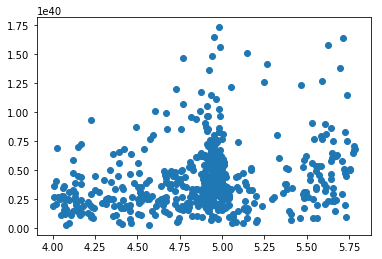

In [33]:
fig, ax = plt.subplots()

ax.scatter(example_table['redshift'], example_table['cigale_dustlumin'])

## More advanced queries

We have written some code in hershelhelp_python to perform more advanced queries. Spefically it is possible to use the depth map tables to get areas that satisfy some depth criteria.


In [16]:


#This function requires pymoc
from pymoc import MOC




def get_depth_coverage(coverage_dict):
    """Generate a Multi-Order Coverage maps corresponding to depth constraints
    This method connects to HELP Virtual Observatory server to get the list of
    HEALPix cells corresponding to depth constraints. The constraints are
    expressed as a dictionnary associated to a band name the minimum depth
    value in this band.
    This method returns the Multi-Order Coverage maps of the corresponding
    area.
    Parameters
    ----------
    coverage_dict : dict
        Dictionnary associating to a band name the required minimum depth
        value.
    Returns
    -------
    pymoc.MOC
        The Multi-Order Coverage map corresponding to the depth constraints in
        HELP data.
    """

    moc_list = []

    for band in coverage_dict:

        query = "select top 100000000 hp_idx_O_13 from " \
                "depth.main where ferr_{}_mean <= {}".format(
                    str(band), float(coverage_dict[band]))

   
        vo_result = vo.tablesearch(
            "http://vohedamtest.lam.fr/__system__/tap/run/tap", query).table

        moc = MOC()
        if len(vo_result):
            #for group in vo_result.group_by('healpix_order').groups:
            #    order = group['healpix_order'][0]
            #    cells = group['healpix_npix']
            #    moc.add(order, cells)
            moc.add(13, vo_result['hp_idx_o_13'])
        moc_list.append(moc)

    result_moc = moc_list.pop()
    for moc in moc_list:
        result_moc = result_moc.intersection(moc)

    return result_moc

In [17]:
#We are using our internal code to convert mad to flux 
#you can comment this and the next cell and set flux_lim = 4.5
#if you don't have hershcelhelp_internal installed
from herschelhelp_internal.utils import mag_to_flux


In [18]:
#Suppose we want all the regions with IRAC 1 depth higher than 24mag. First lets get 24mag in uJy
flux_lim = mag_to_flux([24])[0] * 1.e6
#Lets assume a 5 sigma cut
flux_lim = flux_lim * 5

In [19]:
#The limiting flux an object must have in order to be in the catalogue
flux_lim

array([ 4.5600542])

In [20]:
test_moc = get_depth_coverage({'irac_i1':flux_lim})

In [21]:
#Folder data must exist
test_moc.write('./data/irac_i1_deeper_than_24_MOC.fits', overwrite=True)